In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

# Upload data

In [2]:
x_train = pd.read_csv('data/data_for_model/x_train.csv')
y_train = pd.read_csv('data/data_for_model/y_train.csv')

x_test = pd.read_csv('data/data_for_model/x_test.csv')
y_test = pd.read_csv('data/data_for_model/y_test.csv')

# Test datasets on example

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,  roc_curve, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD, PCA

# x_train.shape 470
svd = PCA(n_components=200)
svd.fit(x_train)  
x_train_component = svd.transform(x_train)
x_test_component = svd.transform(x_test)
x_train_component.shape

(208505, 200)

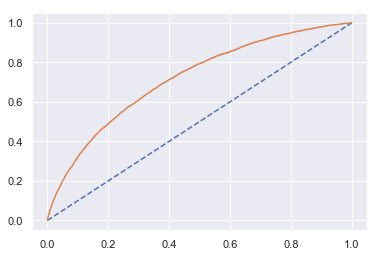

Balanced: 0.5014342930232997
AUC ROC: 0.7165058502190168


In [14]:



# lr = BaggingClassifier(LogisticRegression(), n_estimators=5)
lr = LogisticRegression()

lr.fit(x_train_component, y_train)
y_pred = lr.predict(x_test_component)
probs = lr.predict_proba(x_test_component)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print('Balanced:', balanced_accuracy_score(y_test, y_pred))
print('AUC ROC:', auc)

In [7]:
(lr.predict_proba(x_test_component)[:, 1] > 0.5).sum()

356

In [10]:
# roc_auc_score(y_test, decisions) # 0.6803954026043431
roc_auc_score(y_test, (lr.predict_proba(x_test_component)[:, 1] * 1.0 >= 0.08).astype(int))

0.6745130238623395

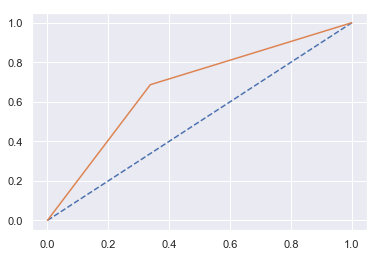

0.6742619308495521


In [33]:
y_pred = lr.predict(x_test)
probs = lr.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, decisions)
fpr, tpr, thresholds = roc_curve(y_test, decisions)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
print(auc)

In [83]:
# Not-full dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6224869941236959; AUC ROC - 0.6689262866227805 
# Remove dataset: over_sampling; SMOTENC; Normalized; Balanced - 0.5717518993575862; AUC ROC - 0.6385838295405608
# Remove dataset: over_sampling; SMOTE;   Normalized; Balanced - 0.6166696521827759; AUC ROC - 0.6598101528558757

# Entire dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - ...; AUC ROC - 0.67
# Fillna dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6215630195718419; AUC ROC -  0.6673514810363779 
# Remove dataset:  Normalized; Balanced - 0.5000795418390073; AUC ROC - 0.6771862974813969
# Fillna dataset:  Normalized; Balanced - 0.5000676194751579; AUC ROC - 0.6764587297733253

# AUC ROC: 0.7410109150314119 | Fillna
# AUC ROC: 0.6775286249421997 without comp
# AUC ROC: 0.6837003042315719 with berue comp
# AUC ROC: 0.6843670107869264 with berue and installment comp
# AUC ROC: 0.6955306952870857 with berue, installment comps, particular features

# Remove dataset: Component; with corr del; Normalized; Balanced - v; AUC ROC -  0.6708015381254901
# Remove dataset: Component; without corr del; Normalized; Balanced - v; AUC ROC - 0.6805247621526884
# Remove dataset: SMOTE; Component; without corr del; Normalized; Balanced - v; AUC ROC - 0.6726899329907432